# Visualization - Decision Tree Classifier - Drug Classification

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

 ### Importing data

In [2]:
Dataset  = pd.read_csv('drug200.csv')

In [3]:
Dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Data Processing

In [5]:
for i in Dataset.Sex.values:
    if i  == 'M':
        Dataset.Sex.replace(i, 0, inplace = True)
    else:
        Dataset.Sex.replace(i, 1, inplace = True)

for i in Dataset.BP.values:
    if i == 'LOW':
        Dataset.BP.replace(i, 0, inplace = True)
    elif i == 'NORMAL':
        Dataset.BP.replace(i, 1, inplace = True)
    elif i == 'HIGH':
        Dataset.BP.replace(i, 2, inplace = True)

for i in Dataset.Cholesterol.values:
    if i == 'LOW':
        Dataset.Cholesterol.replace(i, 0, inplace = True)
    else:
        Dataset.Cholesterol.replace(i, 1, inplace = True)

print(Dataset)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  DrugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            1   14.020  drugX
199   40    1   0            1   11.349  drugX

[200 rows x 6 columns]


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


### Splitting the data

In [7]:
X = Dataset[['Age', 'Sex', 'BP', 'Cholesterol','Na_to_K']]# Features
y = Dataset['Drug']# Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Building the model & Predictions 

In [8]:
# Create Decision Tree classifer object
Dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
Dtc = Dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = Dtc.predict(X_test)

### Evaluating Model

In [9]:
# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.95


### Visualizing the model 

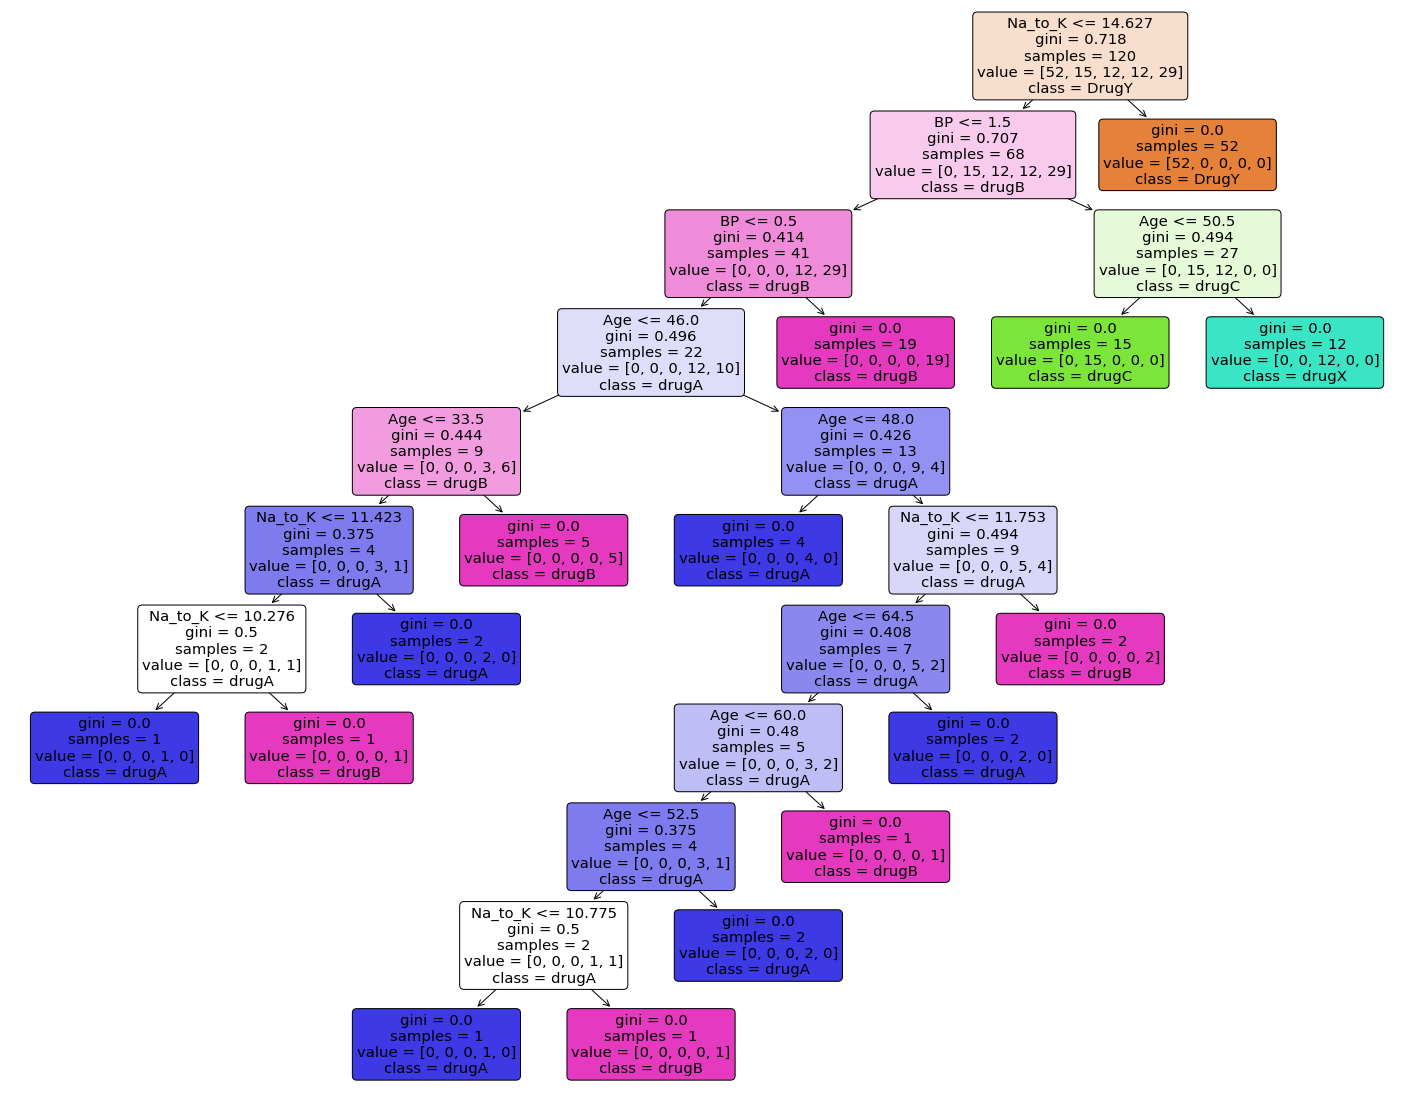

In [10]:
from sklearn import tree


feature_names = Dataset.columns[:5]
target_names = Dataset['Drug'].unique().tolist()

plot_tree(Dtc, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 